In [23]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from keras.models import Sequential
import librosa as lr
import librosa.display
import numpy as np
import pandas as pd
import random
from glob import glob

import warnings
warnings.filterwarnings('ignore')

np.random.seed(1001)

import os
import shutil

import IPython
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
matplotlib.style.use('ggplot')

In [24]:
trainBabyCry = pd.read_csv(r'C:\Users\Gautham\Desktop\data\mixture_data\devtrain\meta\event_list_devtrain_babycry.csv',delimiter='\t',header=None)
trainGlassBrk = pd.read_csv(r'C:\Users\Gautham\Desktop\data\mixture_data\devtrain\meta\event_list_devtrain_glassbreak.csv',delimiter='\t',header=None)
trainGunShot = pd.read_csv(r'C:\Users\Gautham\Desktop\data\mixture_data\devtrain\meta\event_list_devtrain_gunshot.csv',delimiter='\t',header=None,skiprows=[0,1,2])

testBabyCry = pd.read_csv(r'C:\Users\Gautham\Desktop\data\mixture_data\devtest\meta\event_list_devtest_babycry.csv',delimiter='\t',header=None)
testGlassBrk = pd.read_csv(r'C:\Users\Gautham\Desktop\data\mixture_data\devtest\meta\event_list_devtest_glassbreak.csv',delimiter='\t',header=None,skiprows=[0,1,2])
testGunShot =  pd.read_csv(r'C:\Users\Gautham\Desktop\data\mixture_data\devtest\meta\event_list_devtest_gunshot.csv',delimiter='\t',header=None)

In [30]:
frames = [trainBabyCry,trainGlassBrk,trainGunShot]
data_train=pd.concat(frames, axis=0, join='outer', join_axes=None, ignore_index=True,keys=None, levels=None, names=None, verify_integrity=False,copy=True)

frames = [testBabyCry,testGlassBrk,trainGunShot]
data_test=pd.concat(frames, axis=0, join='outer', join_axes=None, ignore_index=True,keys=None, levels=None, names=None, verify_integrity=False,copy=True)


In [32]:
len(data_test)

1490

In [33]:
def labels(full_data):
    
    classes={'babycry':1,'glassbreak':2,'gunshot':3}
    a=[]
    for i in range(len(full_data)):
        a.append(classes.get(full_data[3][i]))
    full_data.insert(loc=4,column='classID',value=a)
    nba["College"].fillna("No College", inplace = True)
    return full_data

In [36]:

data_test

,0,1,2,3,classID
0,mixture_devtest_babycry_000_b8da9d93e4223b58e7...,0.881473,2.721473,babycry,1.0
1,mixture_devtest_babycry_001_1128b63726e9ed59dd...,4.644177,5.424177,babycry,1.0
2,mixture_devtest_babycry_002_144c8465e12c42dffa...,7.232926,9.272926,babycry,1.0
3,mixture_devtest_babycry_003_a34481c056fb62ef7b...,NaN,NaN,NaN,NaN
4,mixture_devtest_babycry_004_eea736d8d16a75a732...,0.147975,1.387975,babycry,1.0
5,mixture_devtest_babycry_005_c1ad8c392784b8fd51...,NaN,NaN,NaN,NaN
6,mixture_devtest_babycry_006_ac7cf07bce820e281f...,0.096576,1.236576,babycry,1.0
7,mixture_devtest_babycry_007_1e646cb18e7cfb7d4b...,0.881473,2.721473,babycry,1.0
8,mixture_devtest_babycry_008_32a8da9bf16ed702d7...,7.930792,11.350792,babycry,1.0
9,mixture_devtest_babycry_009_31d02a8d6a893e9471...,9.071564,9.991564,babycry,1.0


In [9]:
y, sr = librosa.load(r'C:\Users\Gautham\Desktop\data\mixture_data\devtrain\audio\mixture_devtrain_babycry_000_07a75692b15446e9fbf6cc3afaf96097.wav')
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 1292)

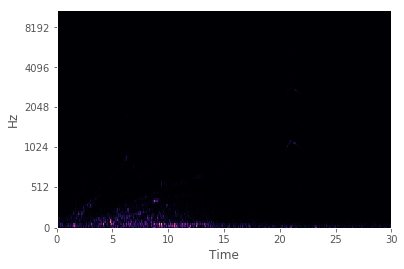

In [10]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [7]:
full_data['path'] = '/' + full_data[0].astype('str')

In [ ]:
D=[]

for row in full_data.itertuples():
    y, sr = librosa.load(r'C:\Users\Gautham\Desktop\data\mixture_data\devtrain\audio' + row.path)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    #if ps.shape != (128, 128): continue
    D.append( (ps, row.classID) )

In [8]:
dataset = D
random.shuffle(dataset)
X_train, y_train = zip(*dataset)

X_train = np.array([x.reshape( (128, 1292, 1) ) for x in X_train])

y_train = np.array(keras.utils.to_categorical(y_train,3,))


NameError: name 'D' is not defined

In [ ]:
y, sr = librosa.load(r'C:\Users\Gautham\Desktop\data\mixture_data\devtrain\audio\mixture_devtrain_babycry_000_07a75692b15446e9fbf6cc3afaf96097.wav')
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape